http://lifelines.readthedocs.io/en/latest/Survival%20Analysis%20intro.html


## Introduction to Survival Analysis
### Applications
```Traditionally, survival analysis was developed to measure lifespans of individuals. An actuary or health professional would ask questions like “how long does this population live for?”, and answer it using survival analysis. For example, the population may be a nation’s population (for actuaries), or a population stricken by a disease (in the medical professional’s case). Traditionally, sort of a morbid subject.```

```The analysis can be further applied to not just traditional births and deaths, but any duration. Medical professionals might be interested in the time between childbirths, where a birth in this case is the event of having a child, and a death is becoming pregnant again! (obviously, we are loose with our definitions of birth and death)! Another example is users subscribing to a service: a birth is a user who joins the service, and a death is when the user leaves the service.```



In [2]:
%matplotlib inline
#import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np

/Users/tomas/miniconda2/envs/py27_cox_nb/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Censorship
```At the time you want to make inferences about durations, it is possible, likely true, that not all the death events have occured yet. For example, a medical professional will not wait 50 years for each individual in the study to pass away before investigating – he or she is interested in the effectiveness of improving lifetimes after only a few years, or months possibly.```

```The individuals in a population who have not been subject to the death event are labeled as right-censored, i.e., we did not (or can not) view the rest of their life history due to some external circumstances. All the information we have on these individuals are their current lifetime durations (which is naturally less than their actual lifetimes).```



```Consider a case where the population is actually made up of two subpopulations, AA and BB. Population AA has a very small lifespan, say 2 months on average, and population BB enjoys a much larger lifespan, say 12 months on average. We might not know this distinction before hand. At t=10, we wish to investigate the average lifespan. Below is an example of such a situation.```




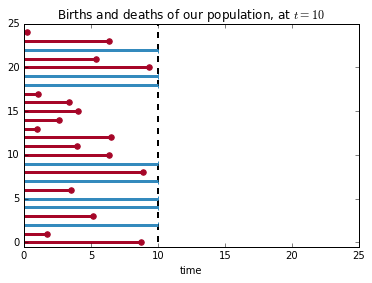

('Observed lifetimes at time 10:\n', array([  0.25433802,   6.32159876,  10.        ,   5.39175825,
         9.35630082,  10.        ,  10.        ,   1.06570734,
         3.34365457,   4.02061081,   2.5873665 ,   0.9578058 ,
         6.52062794,   3.97154748,   6.37467075,  10.        ,
         8.90116807,  10.        ,   3.50230272,  10.        ,
        10.        ,   5.17838476,  10.        ,   1.71299853,   8.77268916]))


In [3]:
from lifelines.plotting import plot_lifetimes
from numpy.random import uniform, exponential

N = 25
current_time = 10
actual_lifetimes = np.array([[exponential(12), exponential(2)][uniform() < 0.5] for i in range(N)])
observed_lifetimes = np.minimum(actual_lifetimes, current_time)
observed = actual_lifetimes < current_time

plt.xlim(0, 25)
plt.vlines(10, 0, 30, lw=2, linestyles='--')
plt.xlabel("time")
plt.title("Births and deaths of our population, at $t=10$")
plot_lifetimes(observed_lifetimes, event_observed=observed)
print("Observed lifetimes at time %d:\n" % (current_time), observed_lifetimes)

```The red lines denote the lifespan of individuals where the death event has been observed, and the blue lines denote the lifespan of the right-censored individuals (deaths have not been observed). If we are asked to estimate the average lifetime of our population, and we naively decided to not included the right-censored individuals, it is clear that we would be serverly underestimating the true average lifespan.```

```Furthermore, if we instead simply took the mean of all observed lifespans, including the current lifespans of right-censored instances, we would still be underestimating the true average lifespan. Below we plot the actual lifetimes of all instances (recall we do not see this information at t=10).```


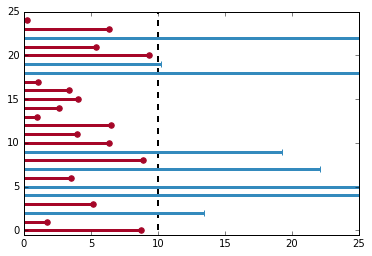

In [4]:
plt.xlim(0,25)
plt.vlines(10, 0, 30, lw=2, linestyles='--')
plot_lifetimes(actual_lifetimes, event_observed=observed)

```Survival analysis was originally developed to solve this type of problem, that is, to deal with estimation when our data is right-censored. Even in the case where all events have been observed, i.e. no censorship, survival analysis is still a very useful tool to understand durations.```

```The observations need not always start at zero, either. This was done only for understanding in the above example. Consider the example where a customer entering a store is a birth: a customer can enter at any time, and not necessarily at time zero. In survival analysis, durations are relative: individuals may start at different times. (We actually only need the duration of the observation, and not the necessarily the start and end time.)```

```We next introduce the two fundamental objects in survival analysis, the survival function and the hazard function.```


### Survival function
```Let T be a (possibly infinite, but always non-negative) random lifetime taken from the population under study. For example, the amount of time a couple is married. Or the time it takes a user to enter a webpage (an infinite time if they never do). The survival function - S(t) - of a population is defined as```

\begin{equation}
S(t)=Pr(T>t)
\end{equation}

```In plain English: the survival function defines the probability the death event has not occured yet at time tt, or equivalently, the probability of surviving past time tt. Note the following properties of the survival function:```

\begin{equation}
0≤S(t)≤1
\end{equation}
\begin{equation}
FT(t)=1−S(t), where FT(t) is the CDF of T, which implies
\end{equation}
\begin{equation}
S(t) is a non-increasing function of t.
\end{equation}

### Hazard curve
We are also interested in the probability of the death event occurring at time tt, given that the death event has not occurred until time tt. Mathematically, that is:

limδt→0Pr(t≤T≤t+δt|T>t)
limδt→0Pr(t≤T≤t+δt|T>t)
This quantity goes to 0 as δtδt shrinks, so we divide this by the interval δtδt (like we might do in calculus). This defines the hazard function at time tt, λ(t)λ(t):

λ(t)=limδt→0Pr(t≤T≤t+δt|T>t)δt
λ(t)=limδt→0Pr(t≤T≤t+δt|T>t)δt
It can be shown with quite elementary probability that this is equal to:

λ(t)=−S′(t)S(t)
λ(t)=−S′(t)S(t)
and solving this differential equation (yes, it is a differential equation), we get:

S(t)=exp(−∫t0λ(z)dz)
S(t)=exp⁡(−∫0tλ(z)dz)
What I love about the above equation is that it defines all survival functions, and because the hazard function is arbitrary (i.e. there is no parametric form), the entire function is non-parametric (this allows for very flexible curves). Notice that we can now speak either about the survival function, S(t)S(t), or the hazard function, λ(t)λ(t), and we can convert back and forth quite easily. It also gives us another, albeit less useful, expression for TT: Upon differentiation and some algebra, we recover:

fT(t)=λ(t)exp(−∫t0λ(z)dz)
fT(t)=λ(t)exp⁡(−∫0tλ(z)dz)
Of course, we do not observe the true survival curve of a population. We must use the observed data to estimate it. We also want to continue to be non-parametric, that is not assume anything about how the survival curve looks. The best method to recreate the survival function non-parametrically from the data is known as the Kaplan-Meier estimate, which brings us to estimation using lifelines.

Link to [Chapter 3](Survival%20Analysis%20ch%203.ipynb)